In [1]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
#sns.set_style('whitegrid')
import h5py
from PIL import Image
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Users/james/Desktop/Projects/ml_strategy


In [5]:
# 确定起止日期
start_date = '2016-01-01 00:00:00'
end_date = '2019-12-20 23:59:59'
# 做一个用于tushare调用的list
from dateutil import rrule
from datetime import datetime

all_dates_list = []
for dt in rrule.rrule(rrule.DAILY,
                      dtstart=datetime.strptime(start_date.split(' ')[0], '%Y-%m-%d'),
                      until=datetime.strptime(end_date.split(' ')[0], '%Y-%m-%d')):
    all_dates_list.append(dt.strftime('%Y-%m-%d'))

In [32]:
df = pd.DataFrame(np.array(all_dates_list),columns=['date'])
df['price'] = np.random.randint(100,400,size=df.shape[0])

In [33]:
df.head()

date  price
0  2016-01-01    182
1  2016-01-02    360
2  2016-01-03    276
3  2016-01-04    138
4  2016-01-05    101

In [34]:
def draw_areachart(Num_Date=180,Span_Date=180):
    
    ax.clear()
    if Num_Date<Span_Date:
        df_temp=df.loc[0:Num_Date,:]
        df_span=df.loc[0:Span_Date,:]
        plt.fill_between(df_temp.date.values, y1=df_temp.price.values, y2=0,alpha=0.75, facecolor='r', linewidth=1,edgecolor ='none',zorder=1)
        plt.plot(df_temp.date, df_temp.price, color='k',zorder=2)
        plt.scatter(df_temp.date.values[-1], df_temp.price.values[-1], color='white',s=150,edgecolor ='k',linewidth=2,zorder=3)
        plt.text(df_temp.date.values[-1], df_temp.price.values[-1]*1.18,s=np.round(df_temp.price.values[-1],1),size=10,ha='center', va='top')
        plt.ylim(0, df_span.price.max()*1.68)
        plt.xlim(df_span.date.values[0], df_span.date.values[-1])
        plt.xticks(ticks=df_span.date.values[0:Span_Date+1:30],labels=df_span.date.values[0:Span_Date+1:30],rotation=0,fontsize=9)
    else:
        df_temp=df.loc[Num_Date-Span_Date:Num_Date,:]
        plt.fill_between(df_temp.date.values[:-2], y1=df_temp.price.values[:-2], y2=0,alpha=0.75, facecolor='r', linewidth=1,edgecolor ='none',zorder=1)
        plt.plot(df_temp.date[:-2], df_temp.price[:-2], color='k',zorder=2)
        plt.scatter(df_temp.date.values[-4], df_temp.price.values[-4], color='white',s=150,edgecolor ='k',linewidth=2,zorder=3)
        plt.text(df_temp.date.values[-1], df_temp.price.values[-1]*1.18,s=np.round(df_temp.price.values[-1],1),size=10,ha='center', va='top')
        plt.ylim(0, df_temp.price.max()*1.68)
        plt.xlim(df_temp.date.values[0], df_temp.date.values[-1])
        plt.xticks(ticks=df_temp.date.values[0:Span_Date+1:30],labels=df_temp.date.values[0:Span_Date+1:30],rotation=0,fontsize=9)
    
    
    plt.margins(x=0.2)
    ax.spines['top'].set_color('none') # 设置上‘脊梁’为红色
    ax.spines['right'].set_color('none') # 设置上‘脊梁’为无色
    ax.spines['left'].set_color('none') # 设置上‘脊梁’为无色
    plt.grid(axis="y",c=(217/256,217/256,217/256),linewidth=1) #设置网格线
    plt.text(0.01, 0.95,"BTC price($)",transform=ax.transAxes, size=10, weight='light', ha='left')
    ax.text(-0.07, 1.03, '2013 to 2019 BTC price',transform=ax.transAxes, size=17, weight='light', ha='left')

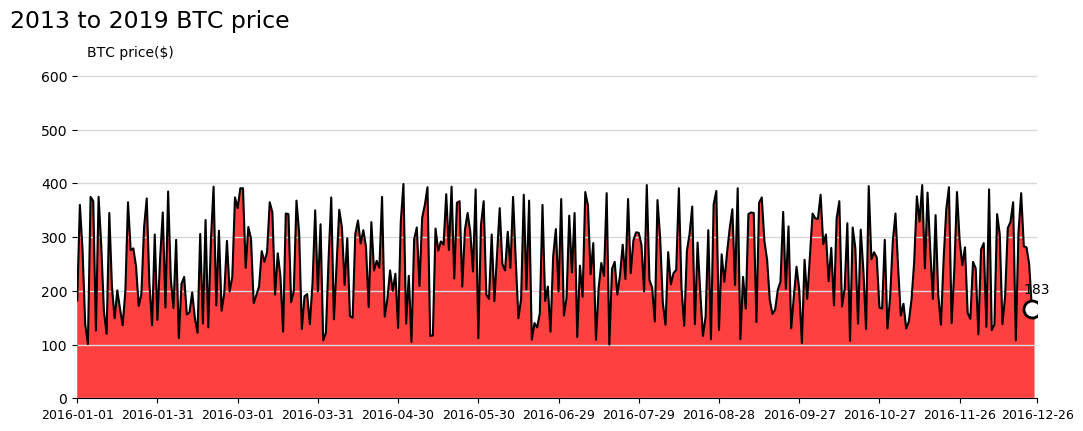

In [35]:
fig, ax = plt.subplots(figsize=(12,4), dpi=100)
plt.subplots_adjust(top=1,bottom=0.1,left=0.1,right=0.9,hspace=0,wspace=0)
draw_areachart(Num_Date=360,Span_Date=360) #num_date: end date

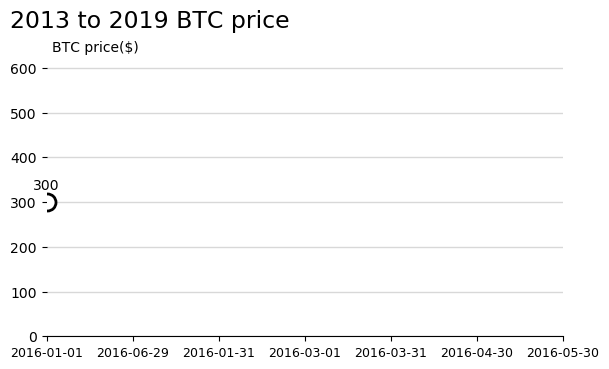

In [31]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
plt.subplots_adjust(left=0.12, right=0.98, top=0.85, bottom=0.1,hspace=0,wspace=0)
animator = animation.FuncAnimation(fig, draw_areachart, frames=np.arange(0,180,1),interval=100)#
HTML(animator.to_jshtml())

In [ ]:
#animator.save(‘animation.gif’)
animator.save('animation.mp4')